# EDA CASE STUDY

Aim: This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Datasets

In [2]:
application = pd.read_csv('application_data.csv')
pd.set_option('display.max_columns', None)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
previous = pd.read_csv('previous_application.csv')
pd.set_option('display.max_columns', None)
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting Datasets

In [4]:
application.shape

(307511, 122)

In [5]:
previous.shape

(1670214, 37)

In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Checking for Missing Values 

In [10]:
pd.set_option('display.max_rows',None)
round(100*(application.isnull().sum()/len(application)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
pd.set_option('display.max_rows',None)
round(100*(previous.isnull().sum()/len(previous)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

## Dropping columns having missing values more than 40%

In [12]:
null = application.isnull().sum()
null = null[null >=0.4*len(application)]
len(null)

49

#### There are 49 columns having missing values more than 40% in Application Dataset.

In [13]:
null1 = previous.isnull().sum()
null1 = null1[null1 >=0.4*len(previous)]
len(null1)

11

#### There are 11 columns having missing values more than 40% in Previous Dataset

In [14]:
#Removing those 49 columns from Application Dataset
null = list(null[null.values>=0.4].index)
application.drop(labels=null,axis=1,inplace=True)

In [15]:
application.shape

(307511, 73)

In [16]:
#Removing those 11 columns from Previous Application Dataset
null1= list(null1[null1.values>=0.4].index)
previous.drop(labels=null1,axis=1,inplace=True)

In [17]:
previous.shape

(1670214, 26)

In [18]:
#Checking again for missing values
pd.set_option('display.max_rows',None)
100*(application.isnull().sum()/len(application))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [19]:
pd.set_option('display.max_rows',None)
100*(previous.isnull().sum()/len(previous))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### Where null values are less than 5% , we can fill them with mode value of the respected column. For categorical columns having  5-40% null values,we can add another category named 'Unknown' in those columns and for numercial columns having 5-40% null values, we can fill nulls with median value of respected columns. 

## Analyze & drop unwanted columns in Application Dataset

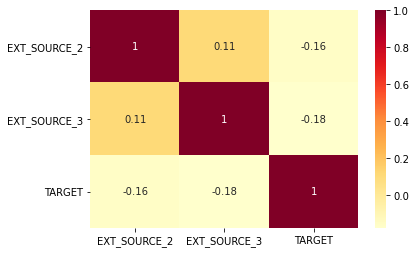

In [20]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,xticklabels=source_corr.columns,yticklabels=source_corr.columns,annot = True,cmap ="YlOrRd")

There is no correlation between target column and ext_source columns. So we can drop them.

In [21]:
#Droping ext_source columns from Application Dataset
Source = ["EXT_SOURCE_2","EXT_SOURCE_3"]
application.drop(labels=Source,axis=1,inplace=True)

In [22]:
#Checking Flag Document Relation with Loan Repayment Column
flag = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

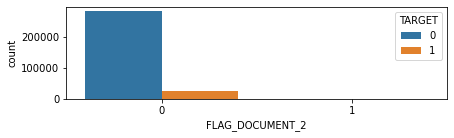

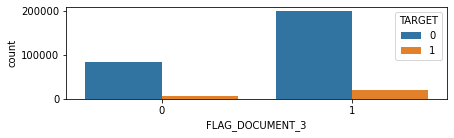

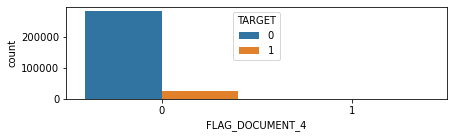

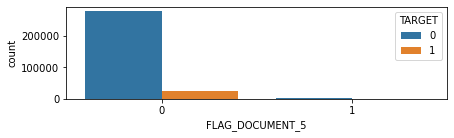

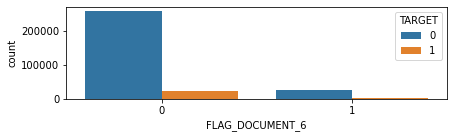

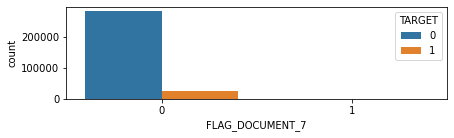

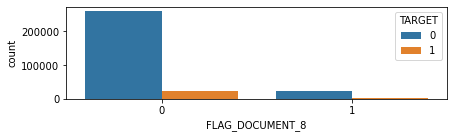

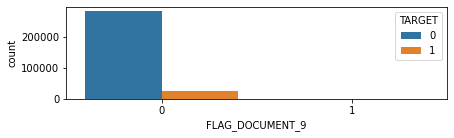

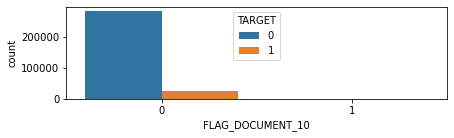

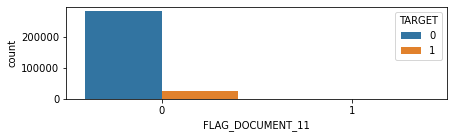

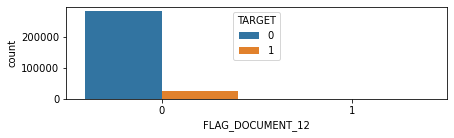

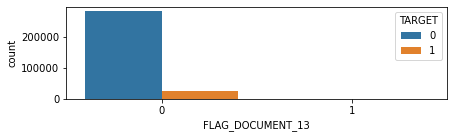

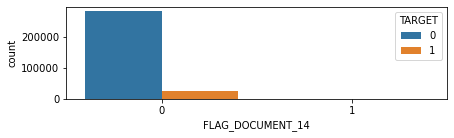

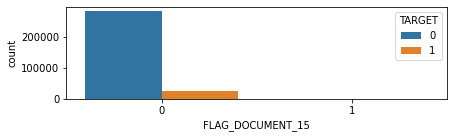

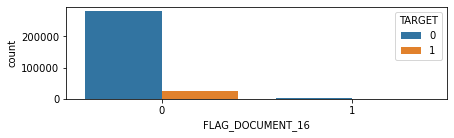

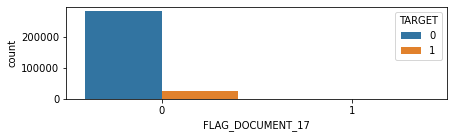

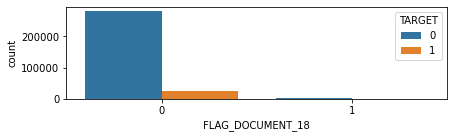

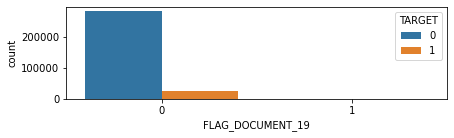

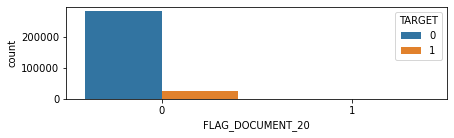

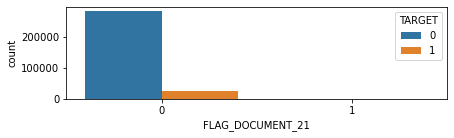

In [23]:
j=0
for i in flag:
    plt.figure(figsize=(15,20))
    plt.subplot(10,2,j+1)
    sns.countplot(application[i],hue = application.TARGET)
    

Mostly in all the plots it shows that clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [24]:
flag1 = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [25]:
#dropping flag document columns from Application Dataset except flag document 3
application.drop(labels=flag1,axis=1,inplace=True)

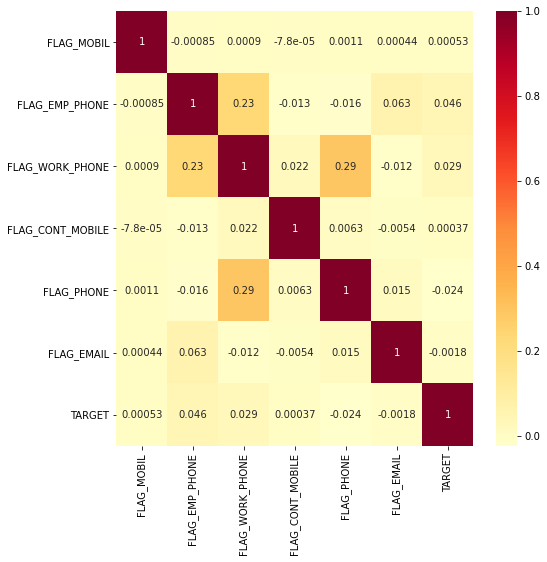

In [26]:
#Checking contact parameters correlation Target Column
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = application[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="YlOrRd",)

There is negligible correlation between contact parameter columns and target column. Thus, we can drop these columns.

In [27]:
#dropping contact parameter columns from Application Dataset
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
application.drop(labels=contact_col,axis=1,inplace=True)

In [28]:
application.shape

(307511, 46)

Thus we are left with 46 columns in Application Dataset.

## Removing Negation from day values in Application Dataset


In [29]:

application.DAYS_BIRTH = abs(application.DAYS_BIRTH)
application.DAYS_EMPLOYED = abs(application.DAYS_EMPLOYED)
application.DAYS_REGISTRATION = abs(application.DAYS_REGISTRATION)
application.DAYS_ID_PUBLISH = abs(application.DAYS_ID_PUBLISH)
application.DAYS_LAST_PHONE_CHANGE = abs(application.DAYS_LAST_PHONE_CHANGE)


In [30]:
previous.DAYS_DECISION = abs(previous.DAYS_DECISION)
previous.SELLERPLACE_AREA = abs(previous.SELLERPLACE_AREA)

## Standardize Values

In [31]:
#Converting Days Birth into age groups
application['AGE_GROUP'] = application['DAYS_BIRTH'] // 365
bins = [0,18,30,40,60,80,100]
age_group = ['0-18','18-30','30-40','40-60','60-80','80 and above']
application['AGE_GROUP']=pd.cut(application['AGE_GROUP'],bins=bins,labels=age_group)

In [32]:
application.AGE_GROUP.value_counts()

40-60           142220
30-40            83117
18-30            52806
60-80            29368
80 and above         0
0-18                 0
Name: AGE_GROUP, dtype: int64

In [33]:
#Converting DAYS_EMPLOYED into EMPLOYED_Years
application.EMPLOYED_YEARS = application.DAYS_EMPLOYED // 365
bins = [0,5,10,15,20,25,30,35,40,50]
years = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40 and above']
application['EMPLOYED_YEARS'] = pd.cut(application.EMPLOYED_YEARS,bins=bins,labels = years)

In [34]:
application['EMPLOYED_YEARS'].value_counts()

0-5             124634
5-10             55983
10-15            22928
15-20             9730
20-25             5465
25-30             2944
30-35             1740
35-40              634
40 and above       175
Name: EMPLOYED_YEARS, dtype: int64

In [35]:
#Converting AMT_INCOME_TOTAL into INCOME_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,1000000]
income = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000 and above']
application['INCOME_RANGE'] = pd.cut(application.AMT_INCOME_TOTAL,bins=bins,labels = income)

In [36]:
application.INCOME_RANGE.value_counts()

100000-150000       91591
150000-200000       64307
50000-100000        59181
200000-250000       48137
250000-300000       17039
300000-350000        8874
350000-400000        5802
400000-500000        5361
0-50000              4517
500000 and above     2452
Name: INCOME_RANGE, dtype: int64

In [37]:
#Converting AMT_CREDIT into CREDIT_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,1200000,15000000]
credit = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000-12000000','12000000 and above']
application['CREDIT_RANGE'] = pd.cut(application.AMT_CREDIT,bins=bins,labels = credit)

In [38]:
application.CREDIT_RANGE.value_counts()

500000-600000         34232
400000-500000         32038
250000-300000         31759
12000000 and above    27859
600000-700000         24049
200000-250000         23054
1000000-12000000      22126
800000-900000         21792
700000-800000         19193
150000-200000         17985
300000-350000         16205
100000-150000         12155
350000-400000         10133
900000-1000000         8927
50000-100000           5443
0-50000                 561
Name: CREDIT_RANGE, dtype: int64

In [39]:
#Creating bins for DAYS_DECISION column
bins = [0,90,180,270,360,450,540,630]
decision = ['0-90','90-180','180-270','270-360','360-450','450-540','540 and above']
previous['DAYS_TOOK_FOR_DECISION'] = pd.cut(previous.DAYS_DECISION,bins=bins,labels=decision)

In [40]:
previous.DAYS_TOOK_FOR_DECISION.value_counts()

180-270          181321
270-360          166586
360-450          129303
90-180           128418
450-540          102503
0-90              88426
540 and above     80836
Name: DAYS_TOOK_FOR_DECISION, dtype: int64

## Merging both the datasets

In [41]:
merged = pd.merge(left=application,right=previous,how='inner',on='SK_ID_CURR')

In [42]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYED_YEARS,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_TOOK_FOR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,18-30,0-5,200000-250000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,540 and above
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40-60,0-5,250000-300000,12000000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40-60,0-5,250000-300000,12000000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40-60,0-5,250000-300000,12000000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-60,NaN,50000-100000,100000-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,X

In [43]:
merged.shape

(1413701, 76)

## Uni-Variate Analysis of Merged Dataset 

In [44]:
def count(figsize,x,title,r):
    plt.figure(figsize = figsize)
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.title(title)
    sns.countplot(x)
    plt.yscale('log')
    plt.xticks(rotation=r)
    plt.show()

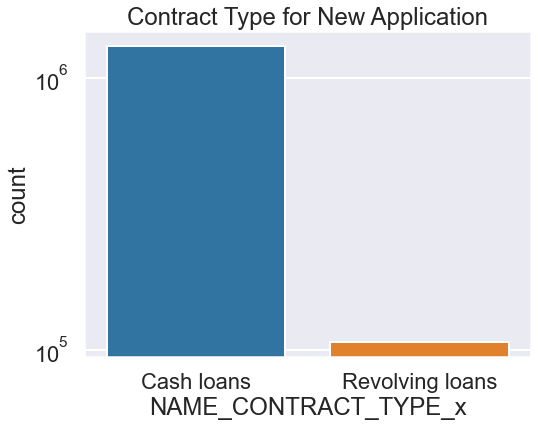

In [45]:
#Plotting Contract Type of Loan
count((8,6),merged.NAME_CONTRACT_TYPE_x,'Contract Type for New Application',0)

* inference 1 = Count of cash loans is highest. Which is more than 1M.
* inference 2 = Count of revolving loans. Which is slightly above 100k.

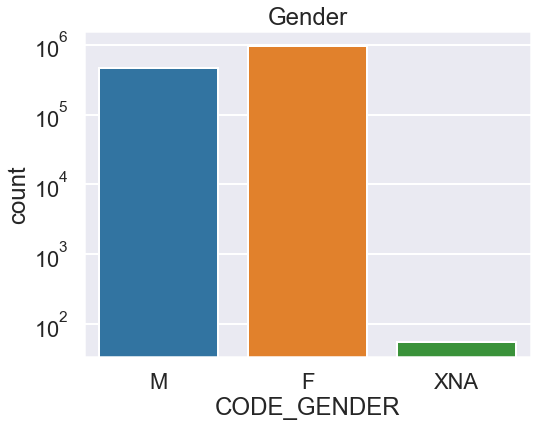

In [46]:
#Plotting Gender of Applicant
count((8,6),merged.CODE_GENDER,'Gender',0)

* inference 1 = Count of Female is more than Male for New Application for loan.

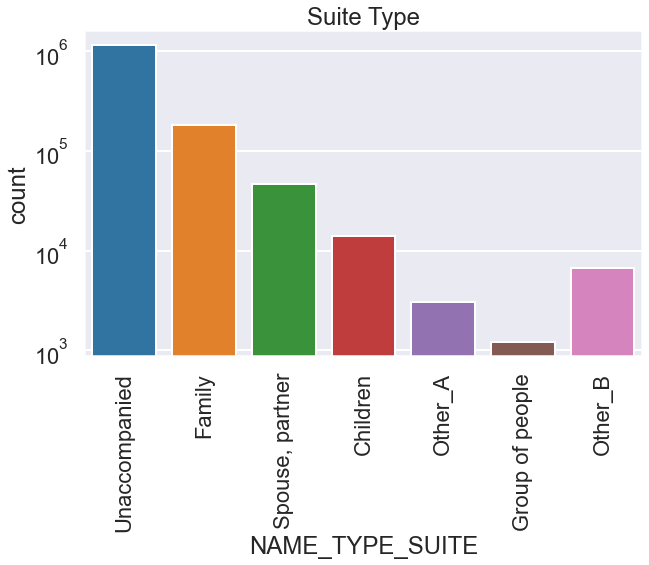

In [47]:
#Plotting Suite Type of Applicant
count((10,6),merged.NAME_TYPE_SUITE,'Suite Type',90)

* inference 1 = People where mostly unaccompained while applying for loan.
* inference 2 = Very less people came with group of peopel to applly for loan.

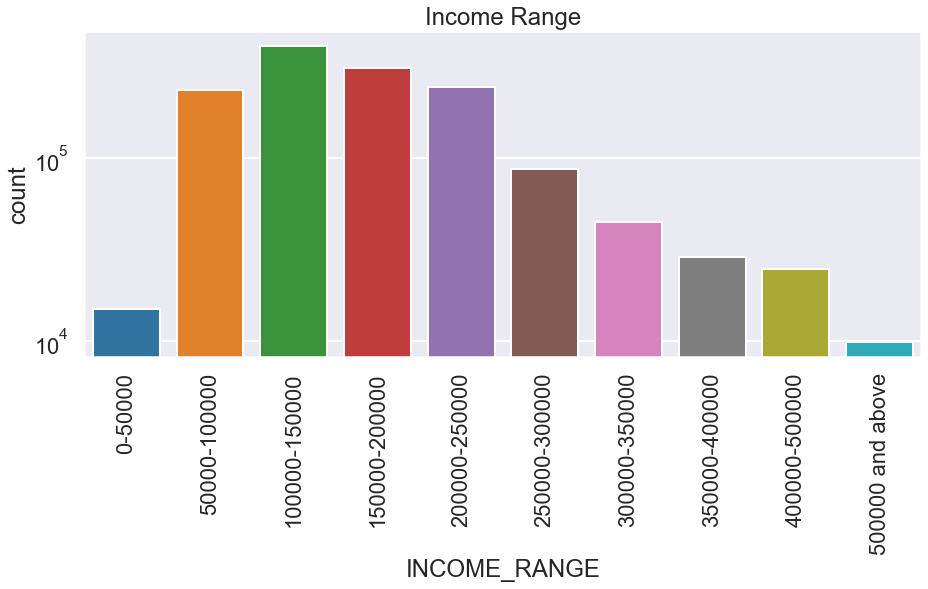

In [48]:
#Plotting Income Range of Applicant
count((15,6),merged.INCOME_RANGE,'Income Range',90)

* inference 1 = Applicants are higly having income ranges of (100000-150000),(150000-200000) and (200000-250000).
* inference 2 = Bottom 3 ranges of income are (0-50000),(500000 and above) and (400000-500000).

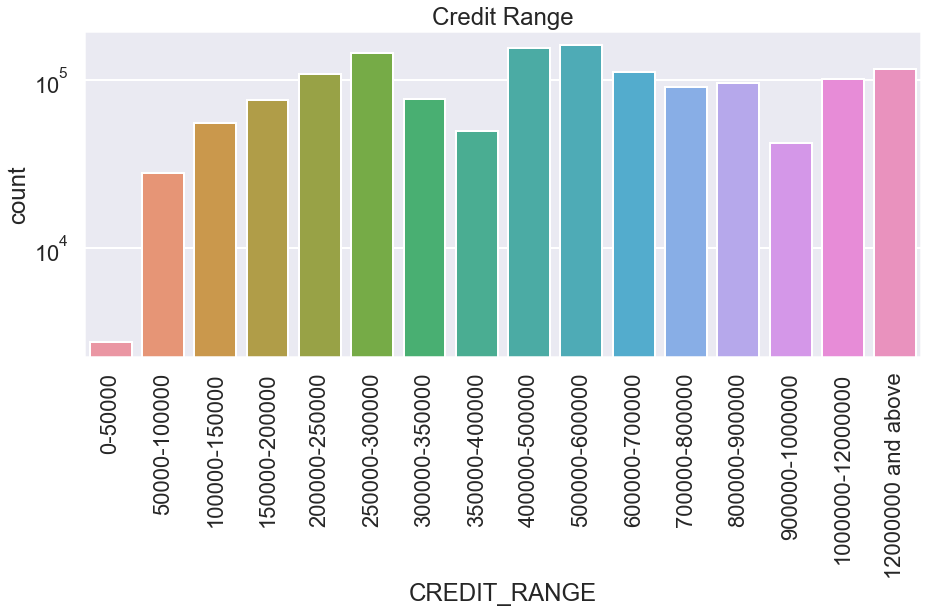

In [49]:
# Plotting Credit Range of Applicant 
count((15,6),merged.CREDIT_RANGE,'Credit Range',90)

* inference 1 = Top 3 credit ranges in this merged dataset are (250000-300000),(400000-500000) and (500000-600000).
* inference 2 = Applicant having (0-50000) credit range are least in number.

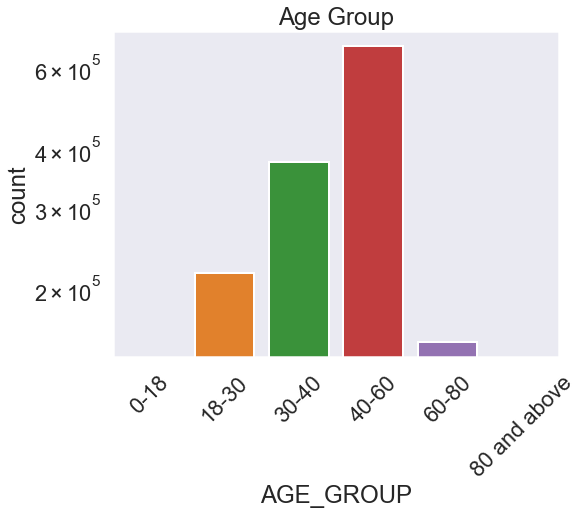

In [50]:
#Plotting Age group of Applicant
count((8,6),merged.AGE_GROUP,"Age Group",45)

* inference 1 = Count of people in age group (40-60) is highest amongst other age groups in this merged dataset.
* inference 2 = Count of people in age group (60-80) is lowest amongst other age groups in this merged dataset..

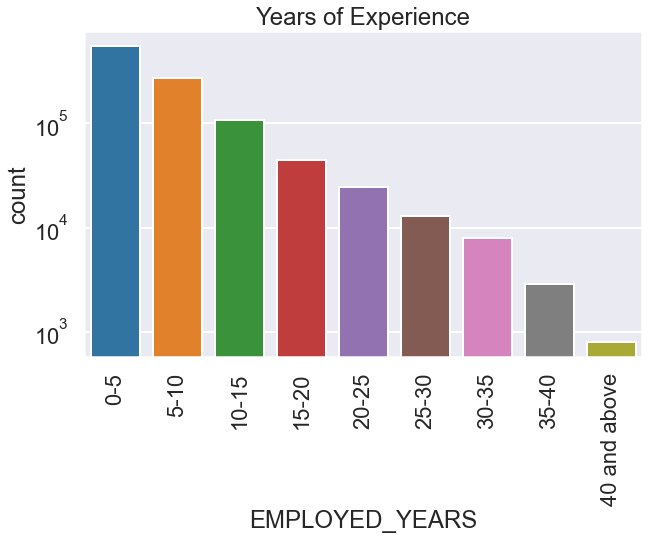

In [51]:
# Plotting Work Experience of Applicant
count((10,6),merged.EMPLOYED_YEARS,'Years of Experience',90)

* inference 1 = Count of people having experience between 0-5 is highest.
* inference 2 = As the years of experience increases, the count of people decreases.

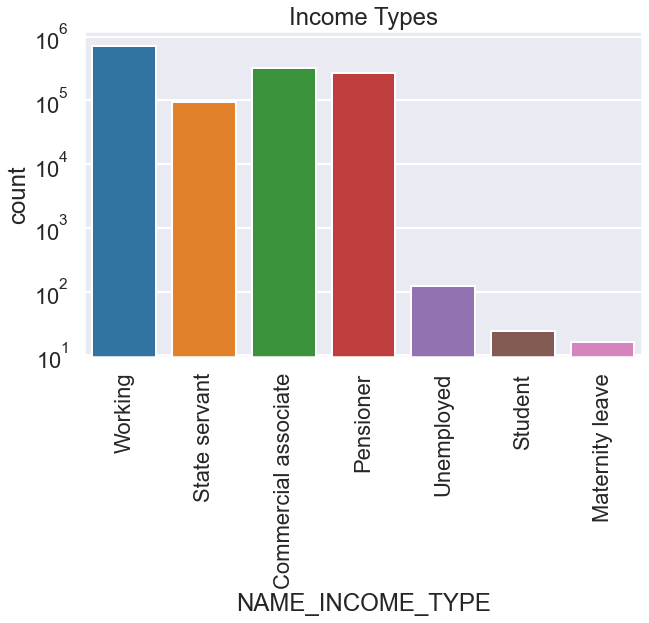

In [52]:
#Plotting Types of Income of Applicant
count((10,6),merged.NAME_INCOME_TYPE,'Income Types',90)

* inference 1 = Count of people having income type "Working" is the highest.
* inference 2 = Counts of people on maternity leave and people who are student are lowest.

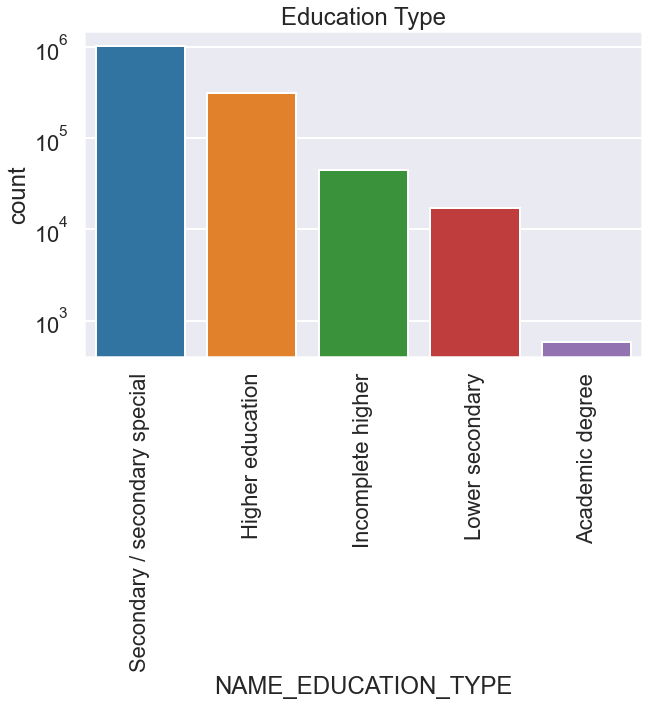

In [53]:
# Plotting Applicant's Education Type
count((10,6),merged.NAME_EDUCATION_TYPE,'Education Type',90)

* inference 1 = Count of people having secondary/secondary special is highest.
* inference 2 = Count of people having academic degree is lowest.

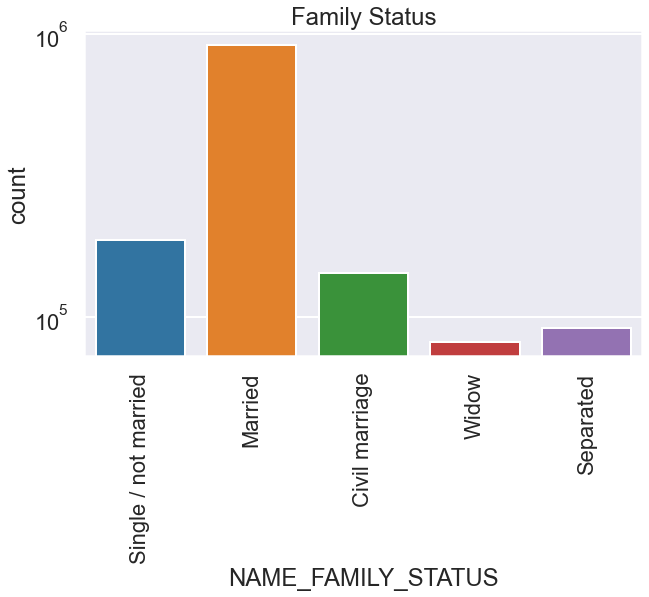

In [54]:
# Plotting Maritial Status of Applicant
count((10,6),merged.NAME_FAMILY_STATUS,"Family Status",90)

* inference 1 = Count of people who are married is highest.
* inference 2 = Count of poeple who are widow is lowest.

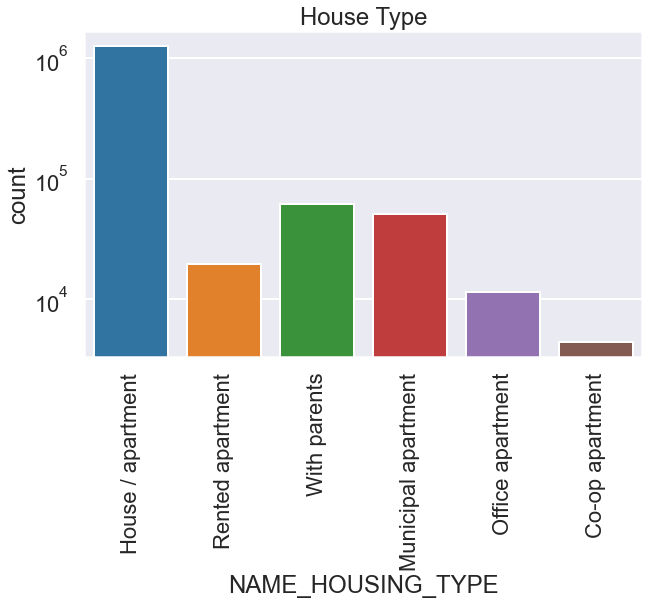

In [55]:
# Plotting Housing Type of Applicant
count((10,6),merged.NAME_HOUSING_TYPE,'House Type',90)

* inference 1 = Most of the people are having House/Apartment.
* inference 2 = There are very less people having Co-op apartment.

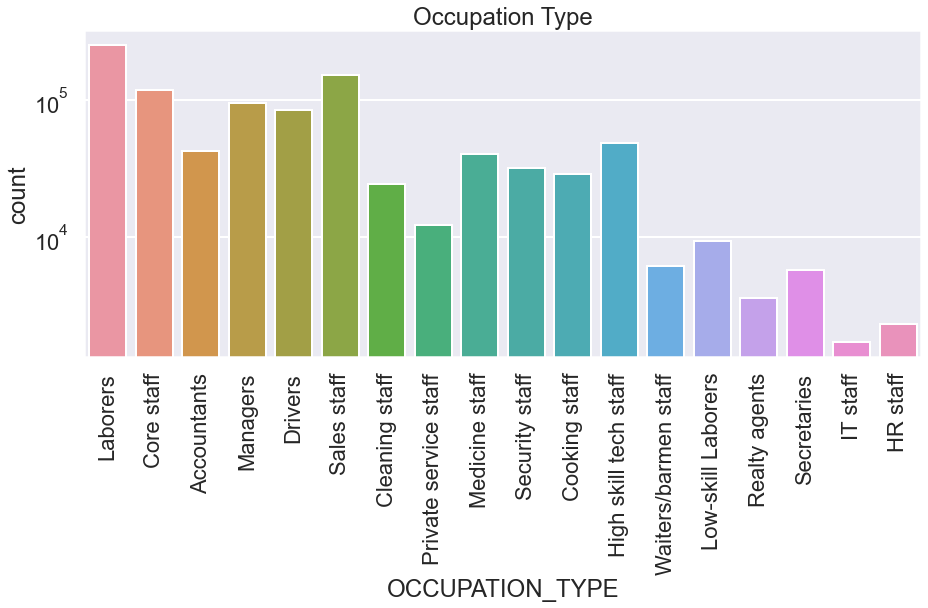

In [56]:
# Plotting Occupation Type of Applicant
count((15,6),merged.OCCUPATION_TYPE,'Occupation Type',90)

* inference 1 = Count of people having laborer type occupation is highest. Secong highest count is of people having sales staff occuptation.
* inference 2 = IT staff and HR staff occupation type has least count.

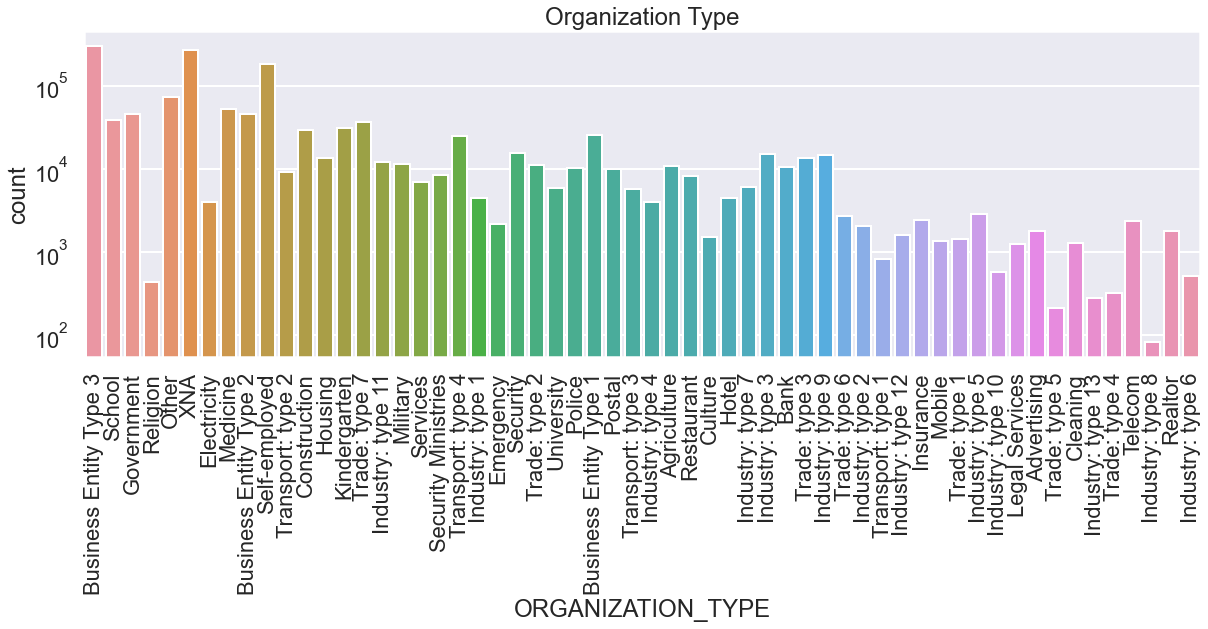

In [57]:
# Plotting Organization Type where Applicant Work
count((20,6),merged.ORGANIZATION_TYPE,'Organization Type',90)

* inference 1 = Count of people working in Business Entity Type 3 is highest. 
* inference 2 = Count of XNA which means Not Applicable is second highest.Which means that many people's organization type is unknown.
* inference 3 = Count of people working in Industrial type 8 is lowest.

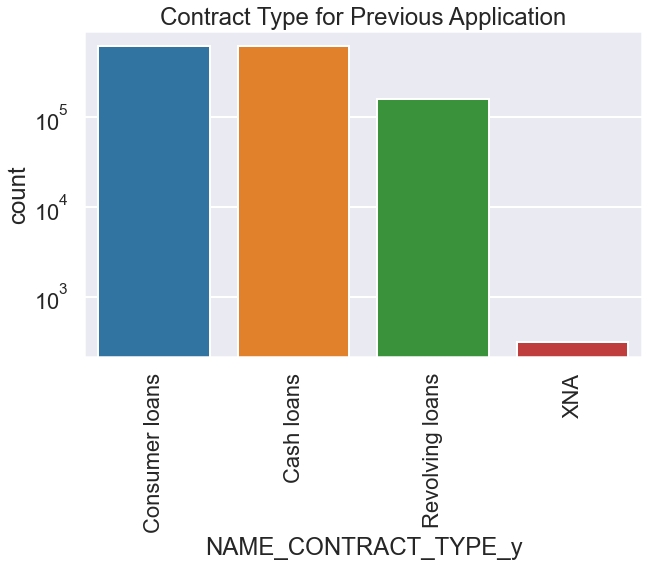

In [58]:
#Plotting Previous Contract Type of Applicant 
count((10,6),merged.NAME_CONTRACT_TYPE_y,'Contract Type for Previous Application',90)

* inference 1 = Previously, people mostly applied for either consumer loan or cash loan.

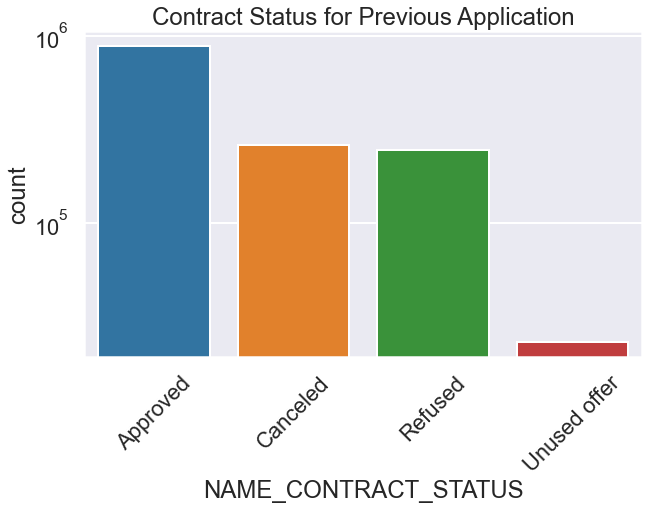

In [59]:
# Plotting Contract Status for Precious Application for Loan
count((10,6),merged.NAME_CONTRACT_STATUS,'Contract Status for Previous Application',45)

* inference 1 = Previously, most of the loans were approved.
* inference 2 = Count of canceled loans and refused loans are almost same.

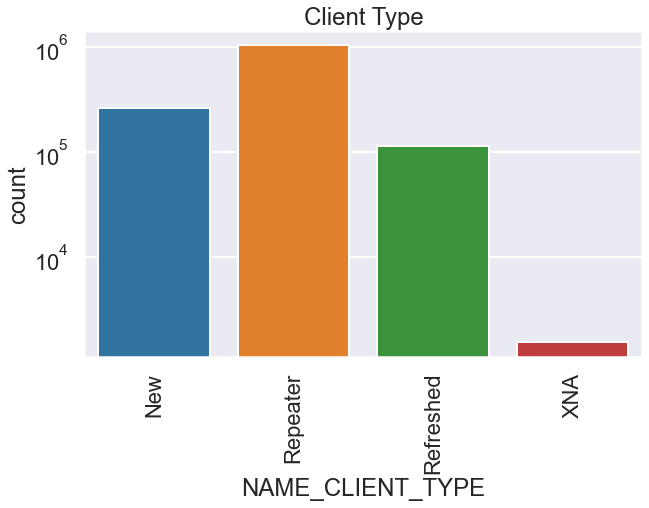

In [60]:
#Plotting Client Type of Previous Application
count((10,6),merged.NAME_CLIENT_TYPE,'Client Type',90)

* inference 1 = People who applied for loans repeatedly are more in number than new people applying for loan.

## Checking for Outliers

In [61]:
def box(col_name,title):
    sns.boxplot(col_name)
    sns.set_style('darkgrid')
    plt.xscale('log')
    plt.title(title)

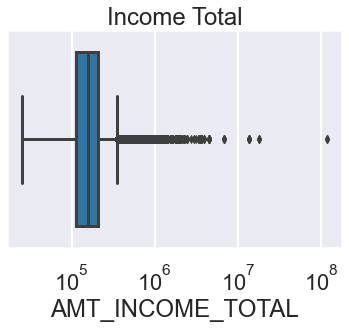

In [62]:
#Plotting boxplot for Income Total
box(merged.AMT_INCOME_TOTAL,'Income Total')

* inference 1 = There are few outliers in this column.
* inference 2 = Majority of income total data lies before 1M.


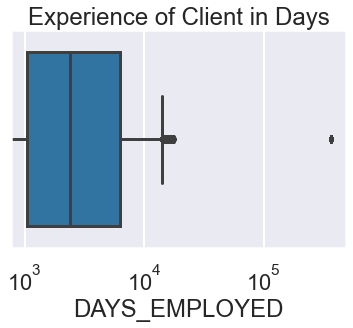

In [63]:
#Plottting boxplot for experience of client
box(merged.DAYS_EMPLOYED,'Experience of Client in Days')

* inference 1 = There is one outlier beyond 100k in this column.
* inference 2 = The 25% of data lies around 1k.

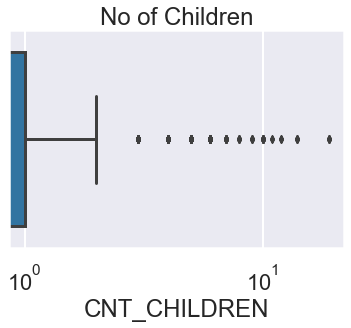

In [64]:
# Plotting boxplot for CNT_CHILDREN
box(merged.CNT_CHILDREN,'No of Children')

* inference 1 = There are many outliers in this column.
* inference 2 = 50% of the children count is equal to 0.

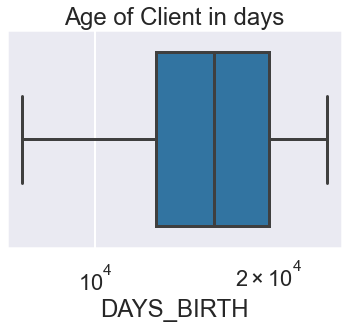

In [65]:
# Plotting boxplot for Age of Client in days
box(merged.DAYS_BIRTH,'Age of Client in days')

* inference 1 = There are no outliers.

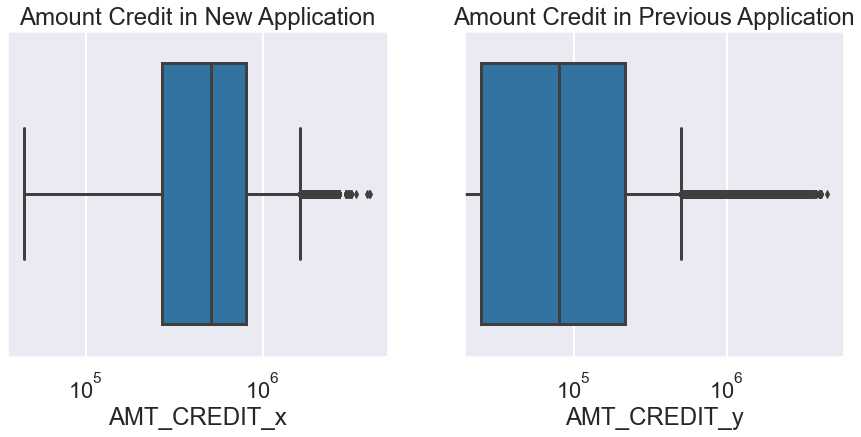

In [66]:
#Plotting boxplots for Amount Credit in New Apllication and Amount Credit in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_CREDIT_x,'Amount Credit in New Application')

plt.subplot(1,2,2)
box(merged.AMT_CREDIT_y,"Amount Credit in Previous Application")

* inference 1 = There is one outlier in amount credit in new applciation.
* inference 2 = Most of the values are in continuous form in both the boxplots.

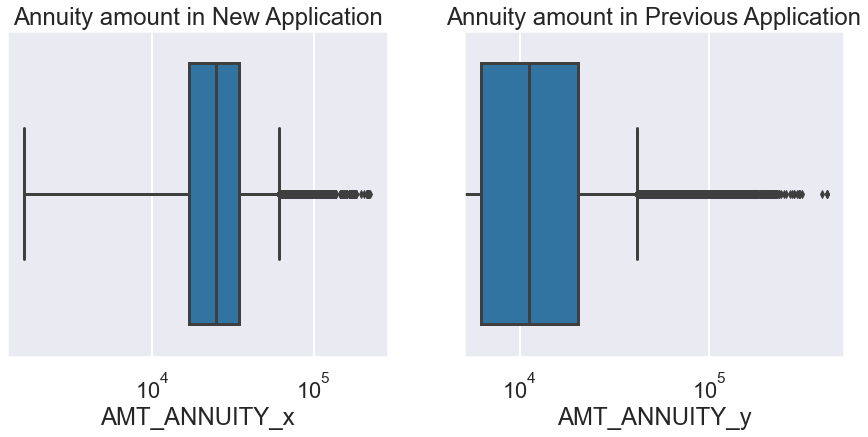

In [67]:
#Plotting boxplots for Annuity Amount in New Apllication and Annuity Amount in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_ANNUITY_x,'Annuity amount in New Application')

plt.subplot(1,2,2)
box(merged.AMT_ANNUITY_y,"Annuity amount in Previous Application")

* inference 1 = There are few outliers in annuity amount in previous applciation.
* inference 2 = Most of the data is in continuous form.

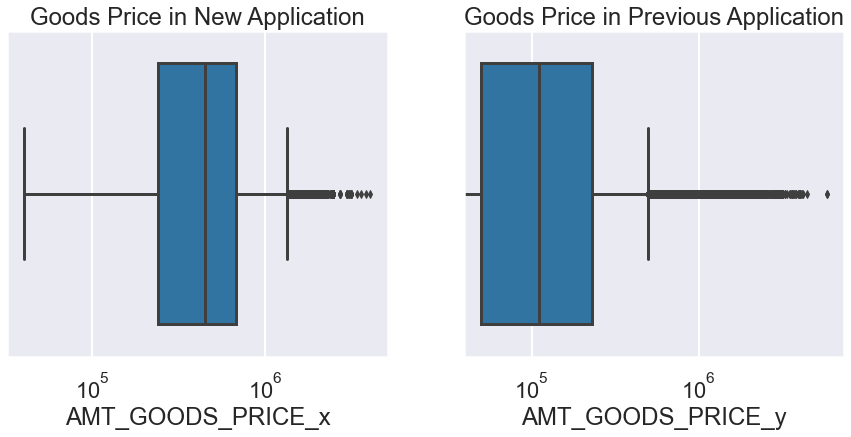

In [68]:
#Plotting boxplot for Goods Price in New and Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_GOODS_PRICE_x,'Goods Price in New Application')
plt.subplot(1,2,2)
box(merged.AMT_GOODS_PRICE_y,'Goods Price in Previous Application')

* inference 1 = There is one outlier in amoung good price in previous application.
* inference 2 = The rest of the data in both the boxplot are in continuous form.

## Segmented Uni-variate Analysis

In [69]:
def uni(df,col,title,hue =None):
    
    sns.set_style('dark')
    sns.set_context('poster')
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette="YlGnBu") 
        
    plt.show()

### Plotting graphs for dataset having target values

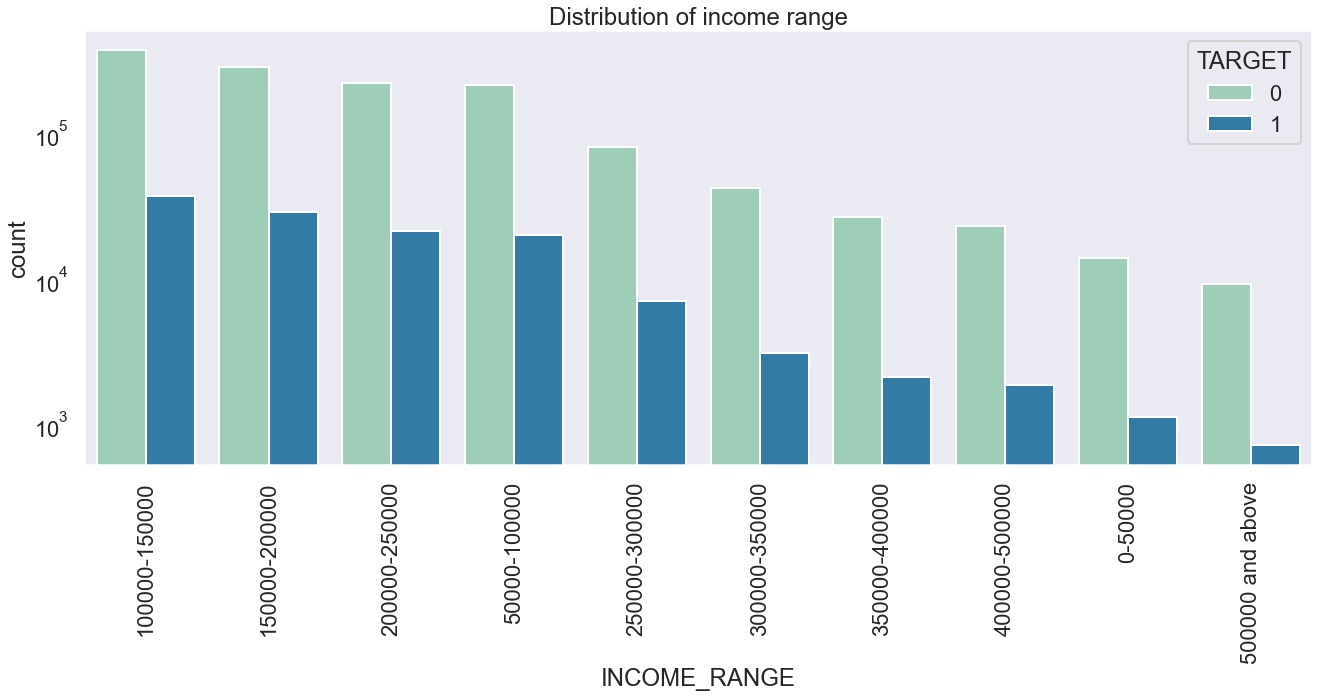

In [70]:
#Plotting DIstribution of Income Range for Target Column
uni(merged,col='INCOME_RANGE',title='Distribution of income range',hue='TARGET')


* inference 1 = Client having income 500000 or above are least defaulters..
* inference 2 = Majorly of client in income range of 50000-250000 are more likely to default loan.

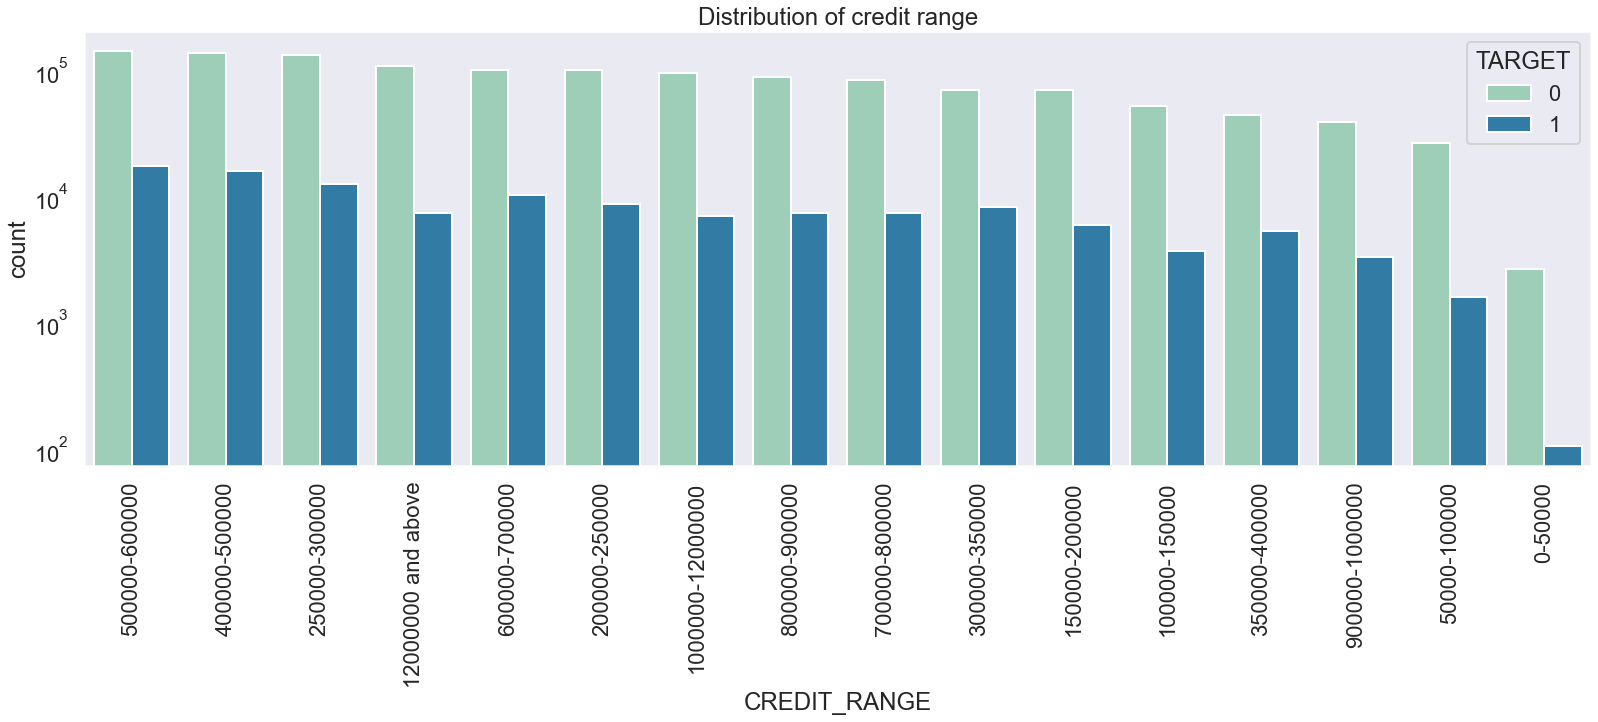

In [71]:
#Plotting Distribution of Credit Range for Target Column
uni(merged,col='CREDIT_RANGE',title='Distribution of credit range',hue='TARGET')


* inference 1 = Client having 0-50000 credit range are least to be a defaulter.
* inference 2 = Clients are found to be defaulters in almost all the credit range except 0-50000.

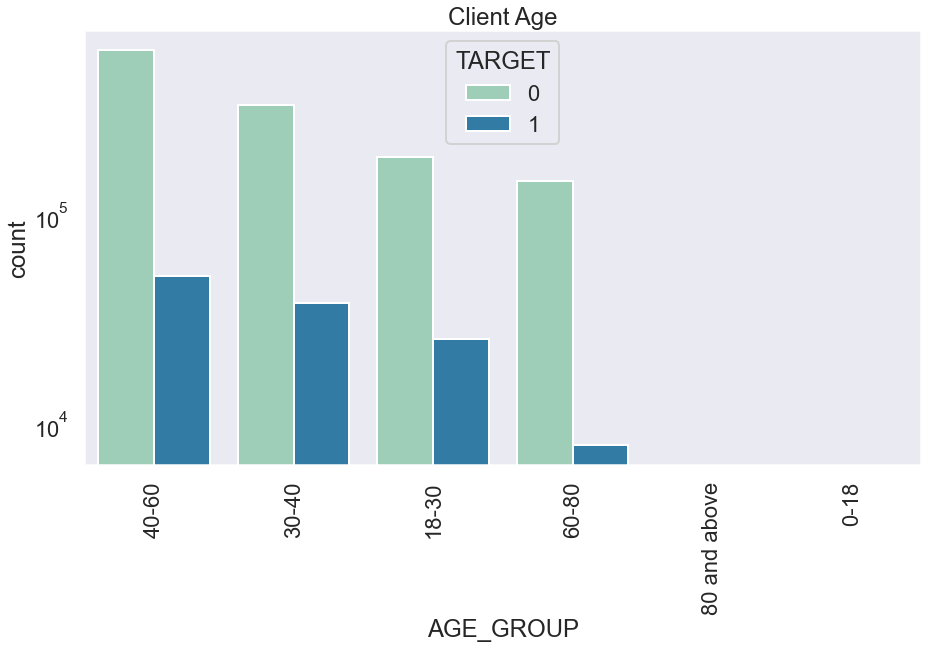

In [72]:
#Plotting Age Group of client
uni(merged,col='AGE_GROUP',title='Client Age',hue='TARGET')


* inference 1 = Client having age between 40-60 are more likely to be a defaulter.
* inference 2 = Client with age between 60-80 are least to be a defaulter.

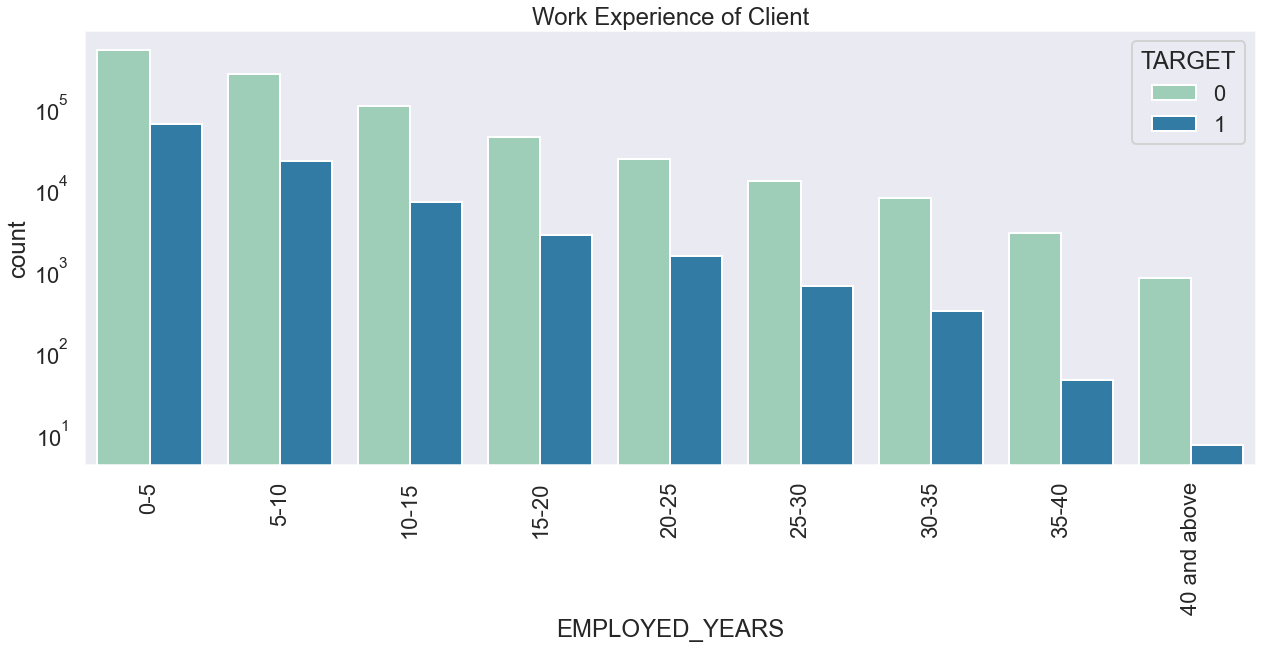

In [73]:
#Plotting Client's Work Experience
uni(merged,col='EMPLOYED_YEARS',title='Work Experience of Client',hue='TARGET')


* inference 1 = Clients having work experience of 0-5 are mostly likely to form a defaulter.
* inference 2 = As the years of work experience increases, client becomes less likely to be a defaulter.

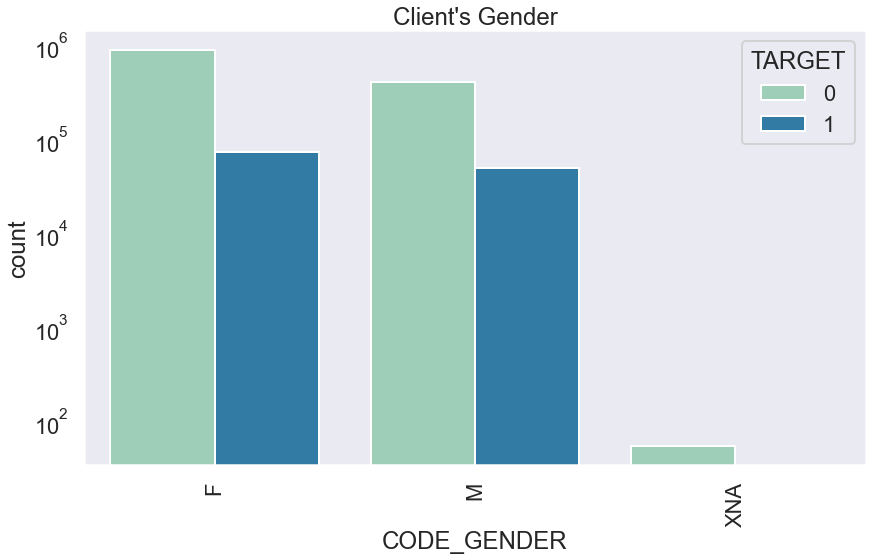

In [74]:
#Plotting Client's Gender
uni(merged,col='CODE_GENDER',title="Client's Gender",hue='TARGET')


* inference 1 = Female clients are more likely to be a defaulter than male clients.
* inference 2 = Also female clients are good repayers of loans than male clients.

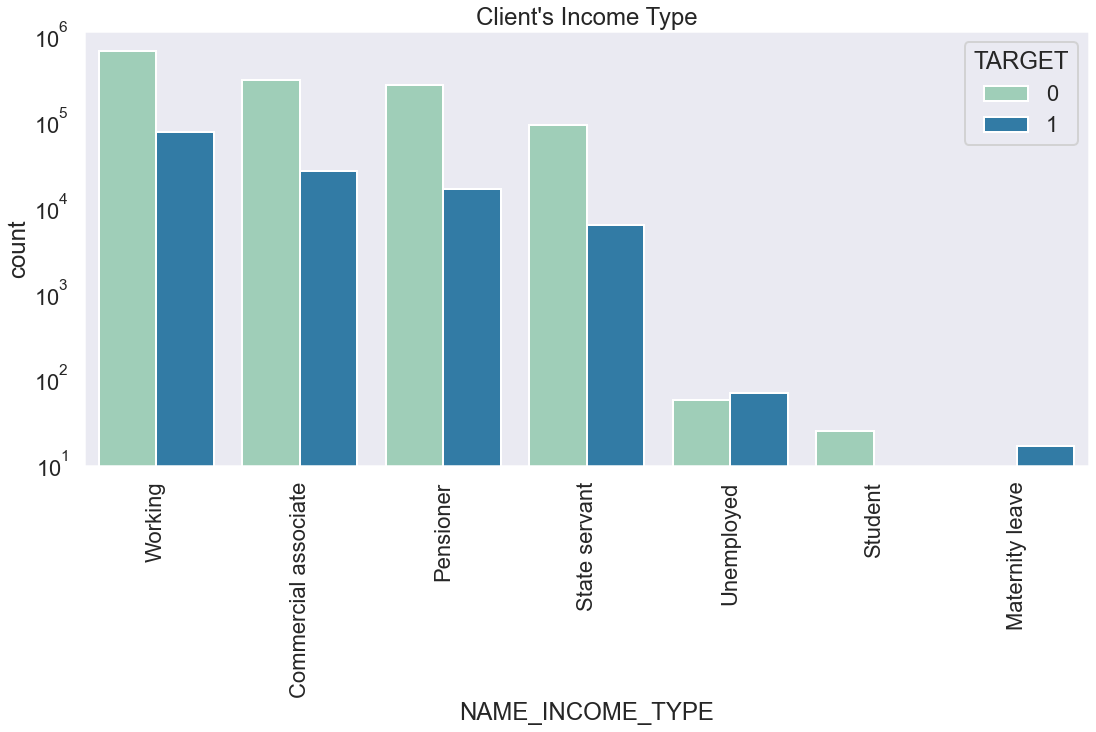

In [75]:
#Plotting Client's Income Type
uni(merged,col='NAME_INCOME_TYPE',title="Client's Income Type",hue='TARGET')


* inference 1 = Client who are working to earn income are more likely to be a defaulter.
* inference 2 = Also client on maternity leave are mostly a defaulter.
* inference 3 = Unemployed clients repayment to default ratio is highest. 

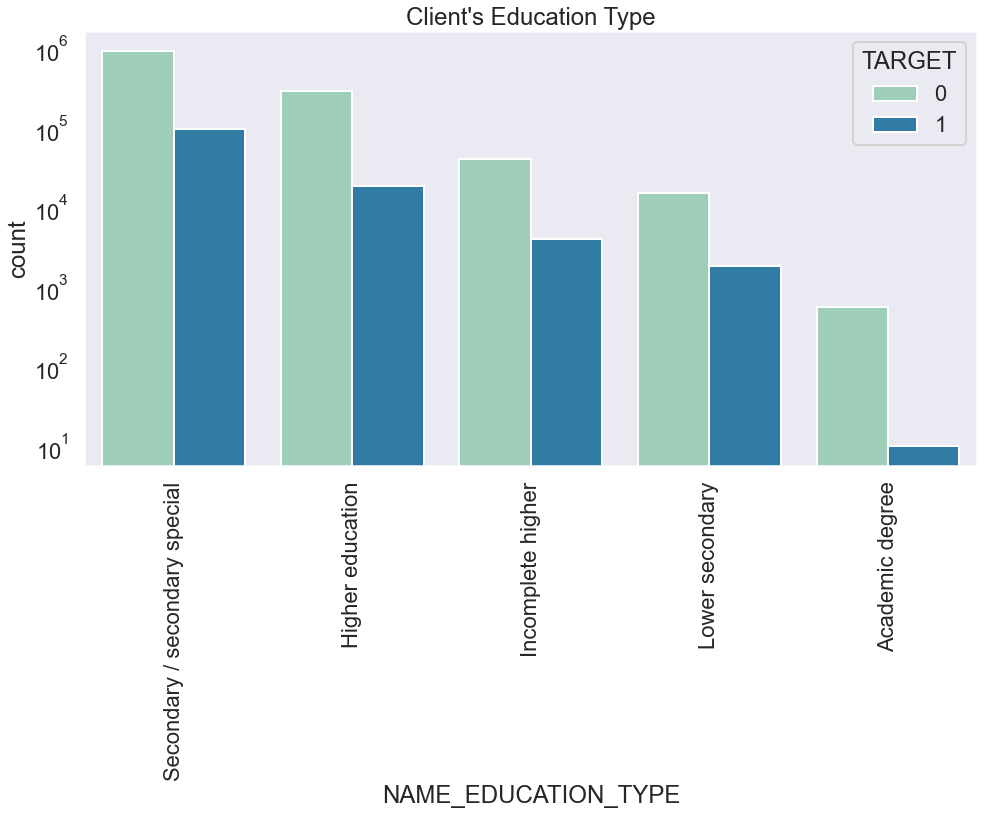

In [76]:
#Plotting Client's Education Type
uni(merged,col='NAME_EDUCATION_TYPE',title="Client's Education Type",hue='TARGET')


* inference 1 = Client having Secondary/Secondary Special education are most likely to default the loan.
* inference 2 = Client with academic degrees are least likely to default the loan.

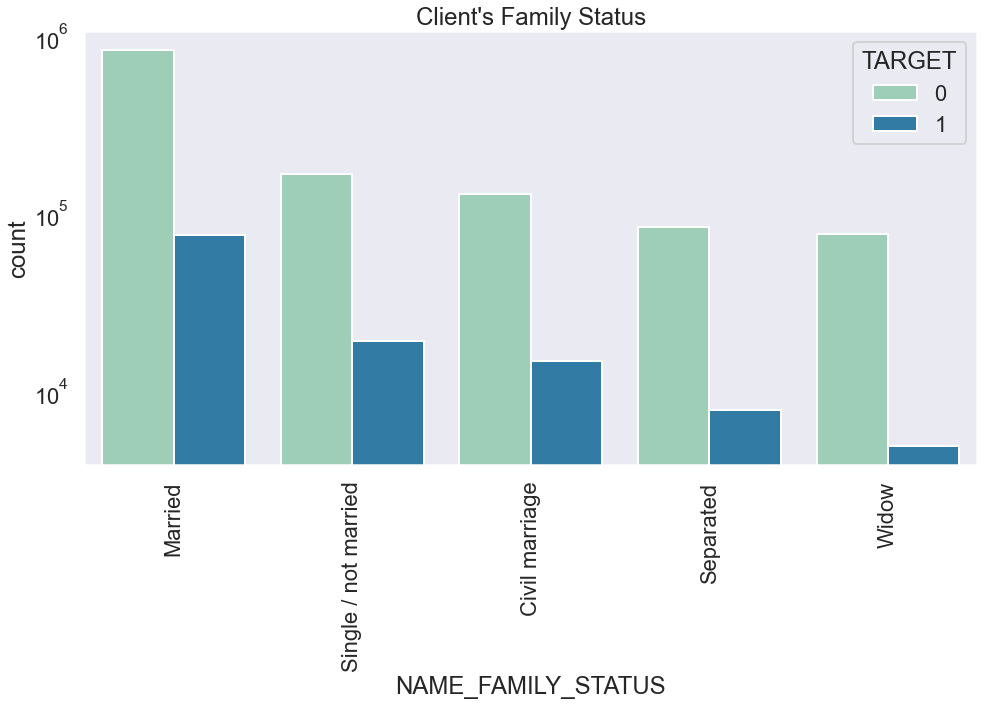

In [77]:
#Plotting Client's Family Status
uni(merged,col='NAME_FAMILY_STATUS',title="Client's Family Status",hue='TARGET')

* inference 1 = Widow and Separated Clients are least likely to be a defaulter.
* inference 2 = Married Clients are mostly likely to be a defaulter.

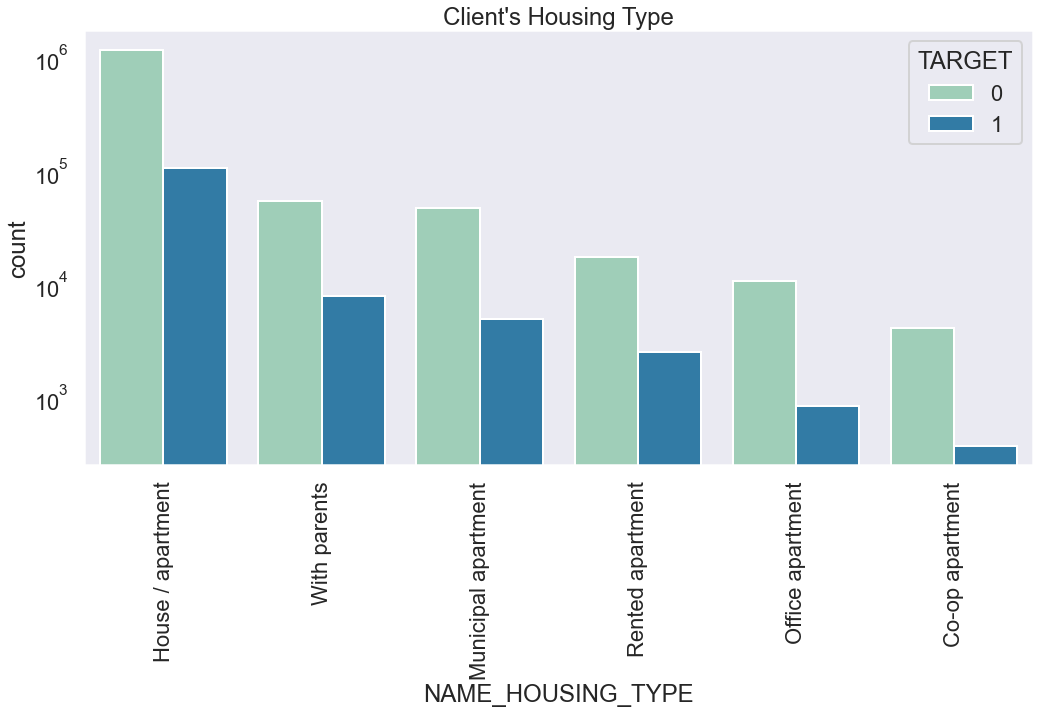

In [78]:
#Plotting Client's Housing Type
uni(merged,col='NAME_HOUSING_TYPE',title="Client's Housing Type",hue='TARGET')


* inference 1 = Clients having Co-op apartment housing type are least likely to be a defaulter.
* inference 2 = Clients having own house/apartment are more likely to be a defaulter.

## Dividing Merged Dataset based on Target value (0,1)

In [79]:
merged0 = merged[merged.TARGET == 0]
merged1 = merged[merged.TARGET == 1]

In [80]:
round(len(merged0)/len(merged1),2)

10.55

The ratio of imbalance between merged0 and merged1 is 10.55

## Finding correlation amongst numerical columns where Target = 0

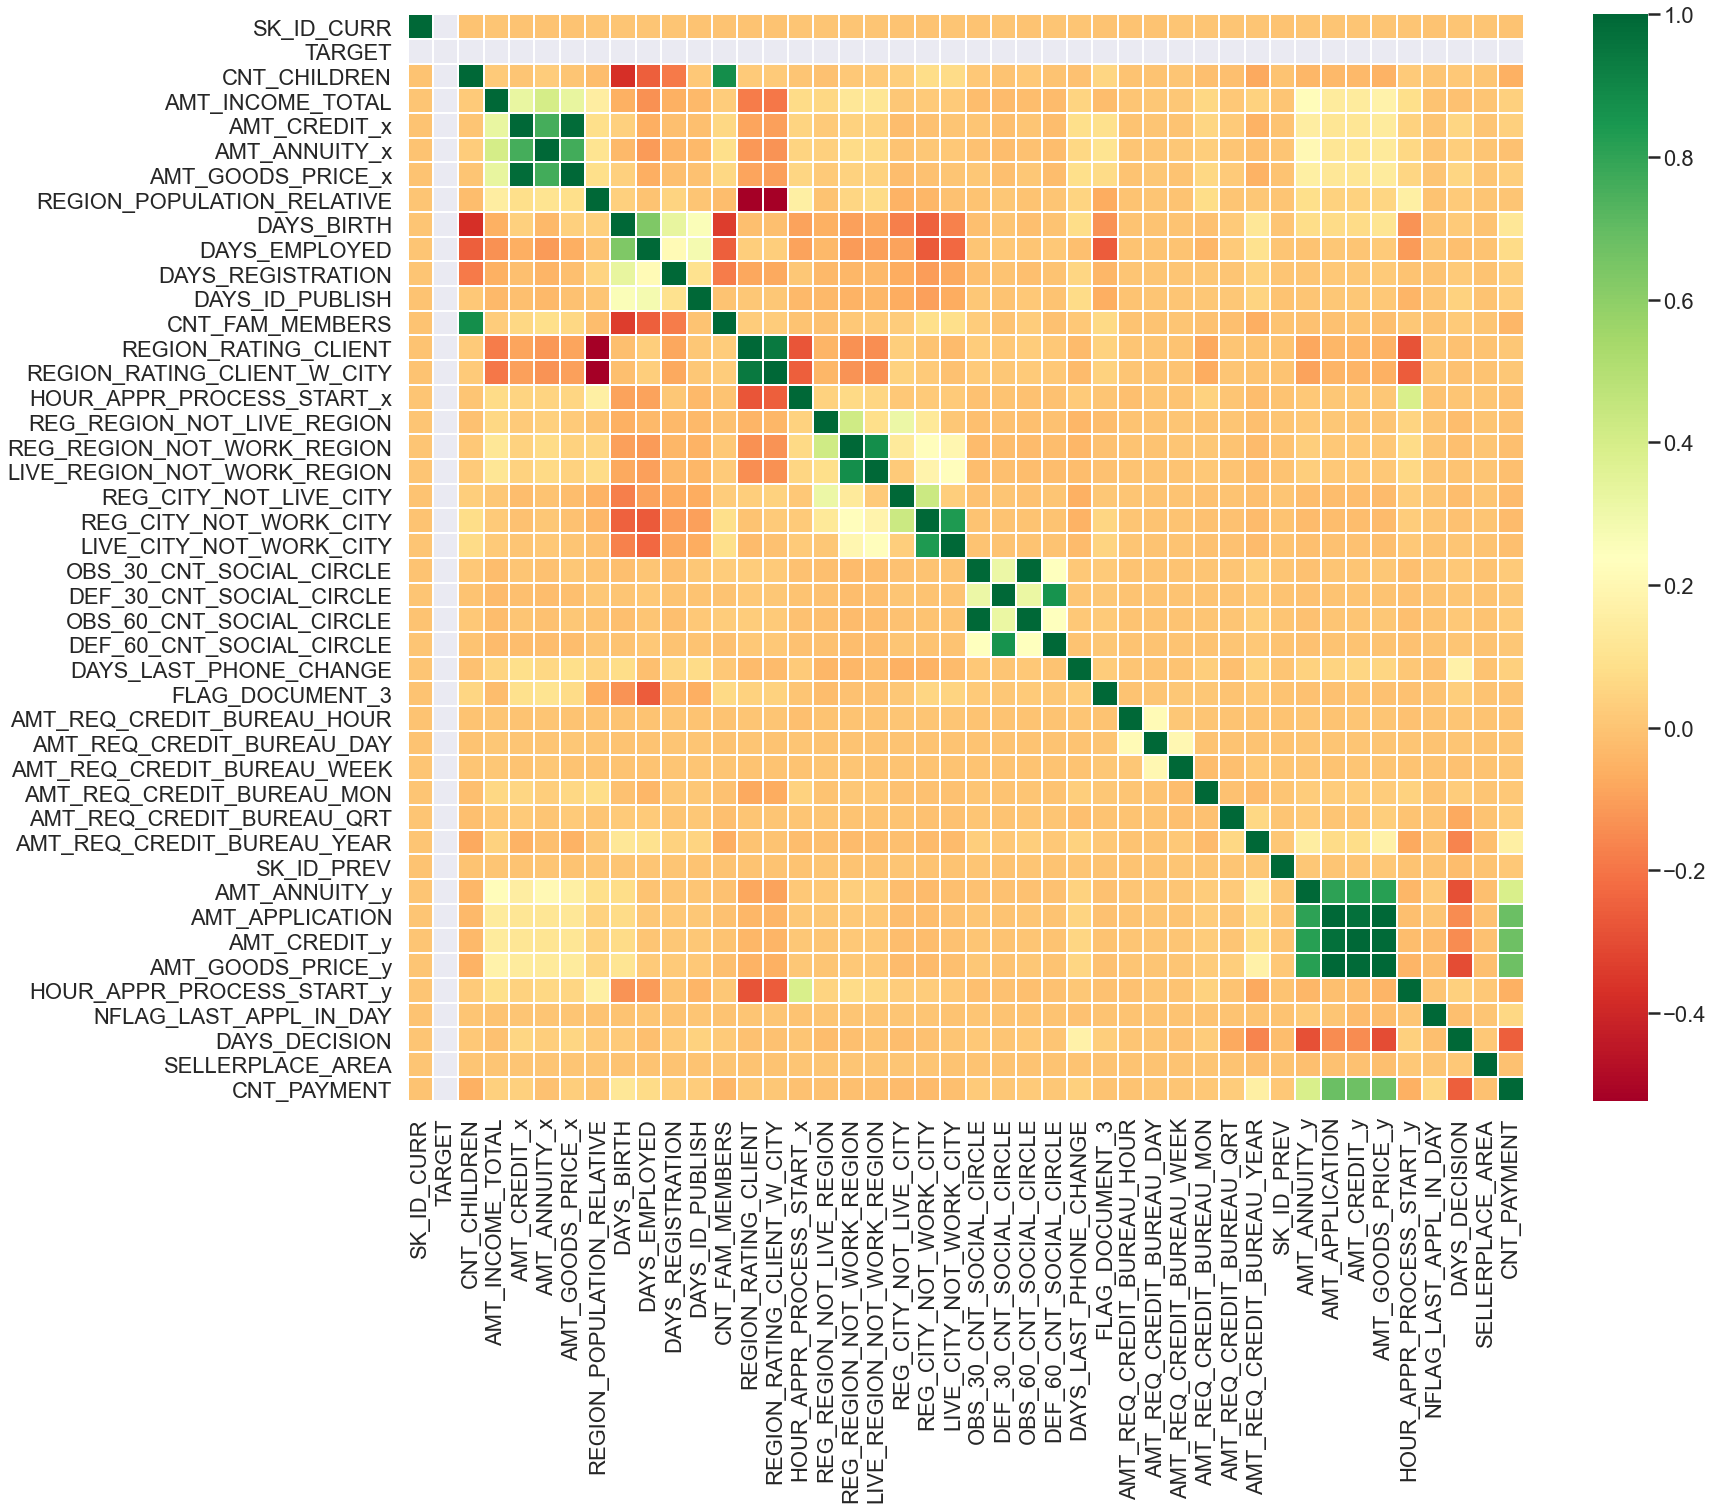

In [81]:
plt.figure(figsize=(25,20))
sns.heatmap(merged0.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

In [89]:
#top 10 Correlation for target - 0
correlation_0_target = merged0.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999888,0.999888
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998578,0.998578
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.993299,0.993299
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.986593,0.986593
1664,AMT_CREDIT_y,AMT_APPLICATION,0.975725,0.975725
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.944356,0.944356
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878475,0.878475
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.875761,0.875761
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.863099,0.863099
944,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.835641,0.835641


## Finding correlation amongst numerical columns where Target = 1

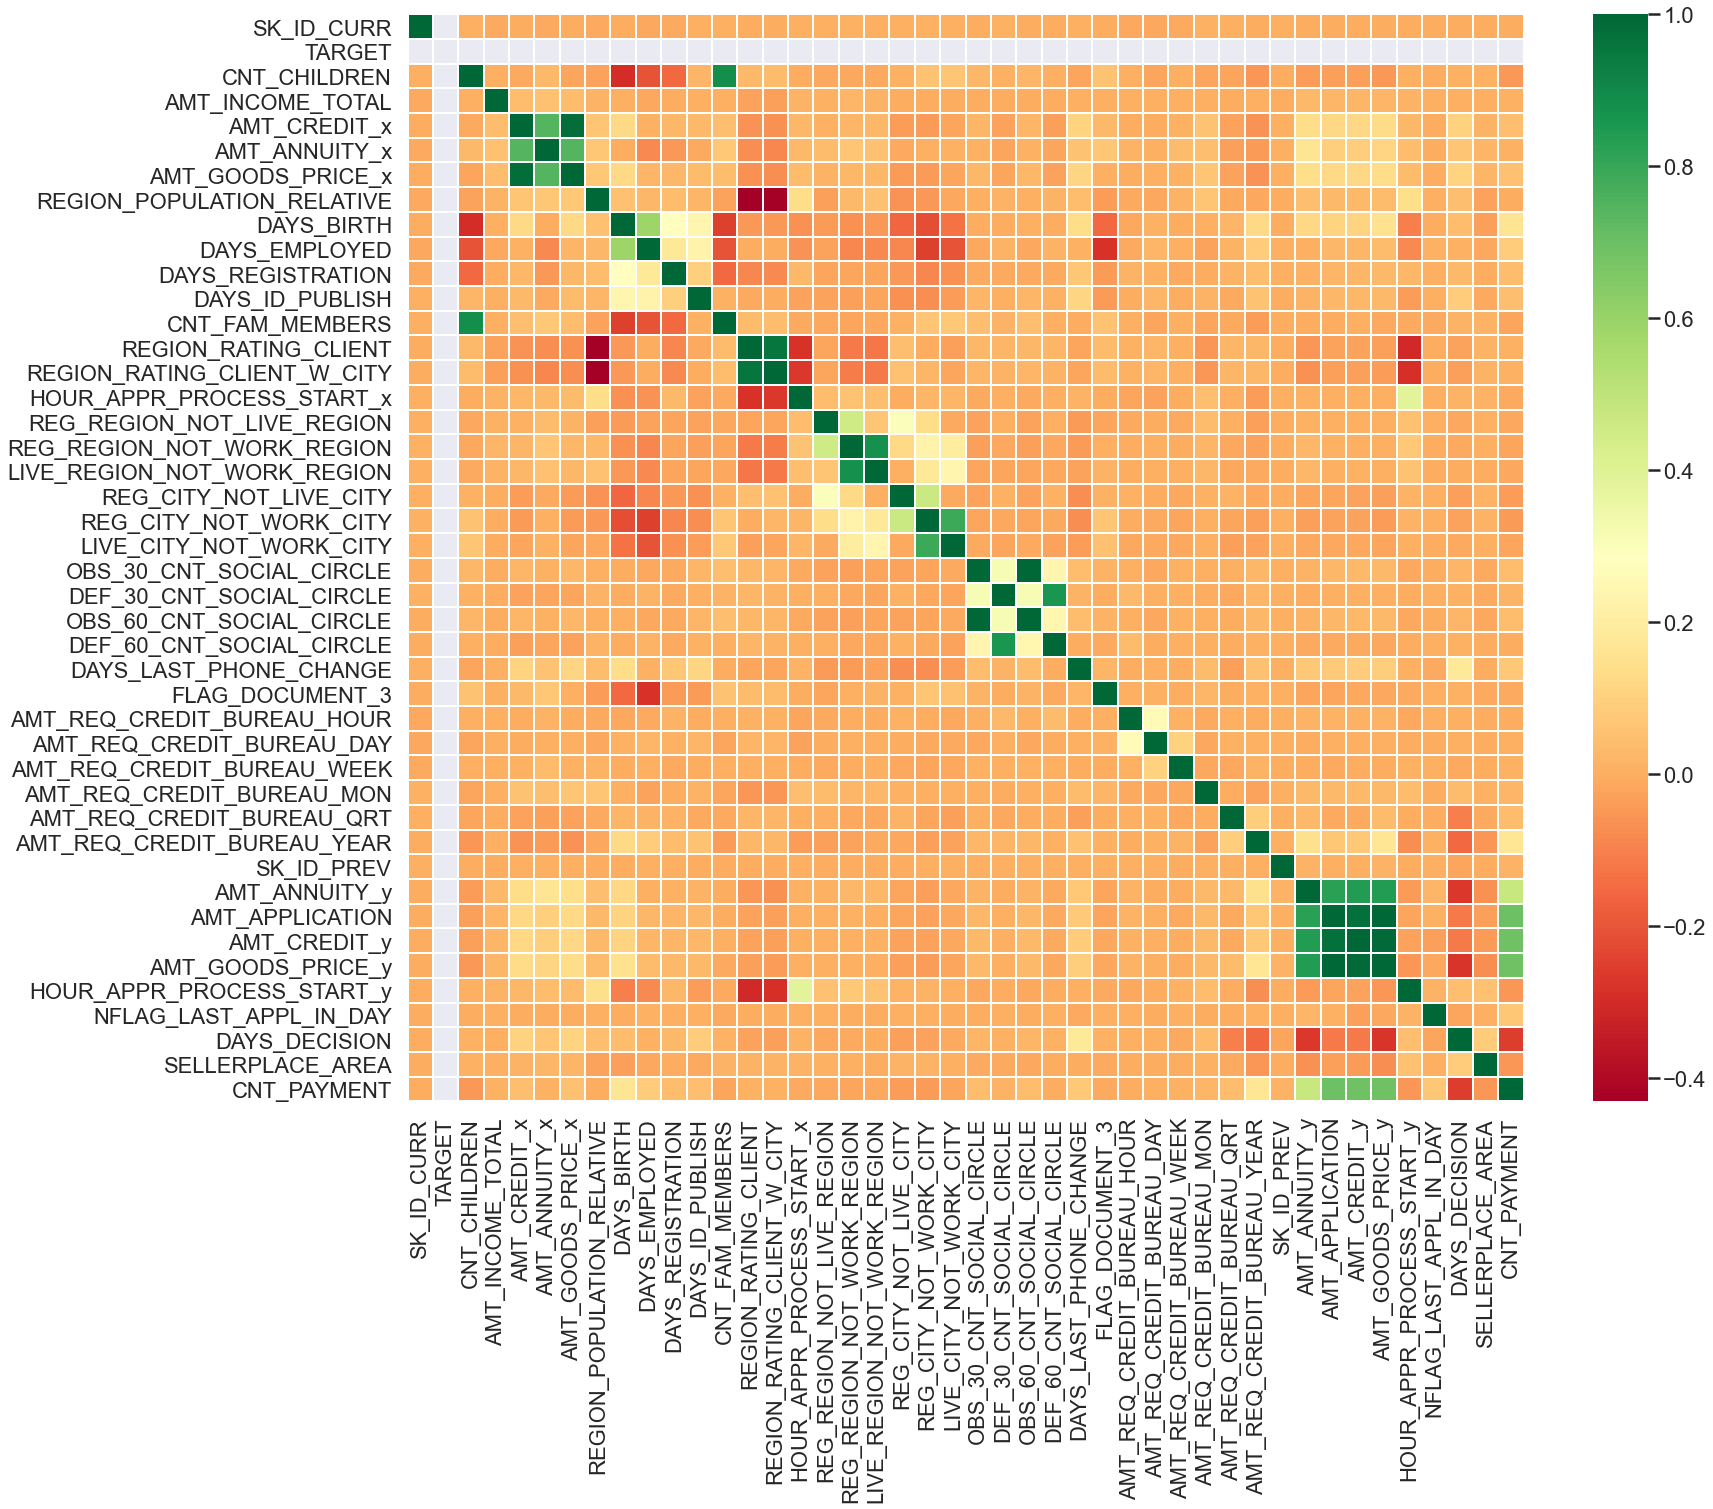

In [82]:
plt.figure(figsize=(25,20))
sns.heatmap(merged1.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

In [90]:
correlation_1_target = merged1.corr()
correlation_1_target = correlation_1_target.where(np.triu(np.ones(correlation_1_target.shape), k=1).astype(np.bool))
correlation_1_target = correlation_1_target.unstack().reset_index().dropna(subset = [0])
correlation_1_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_1_target['Corr_abs'] = abs(correlation_1_target['Correlation_Value'])
correlation_1_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_1_target.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.999676,0.999676
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998378,0.998378
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.992302,0.992302
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.982912,0.982912
1664,AMT_CREDIT_y,AMT_APPLICATION,0.975377,0.975377
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956483,0.956483
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886300,0.886300
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.873130,0.873130
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858281,0.858281
1663,AMT_CREDIT_y,AMT_ANNUITY_y,0.840461,0.840461


## Bi-Variate Analysis

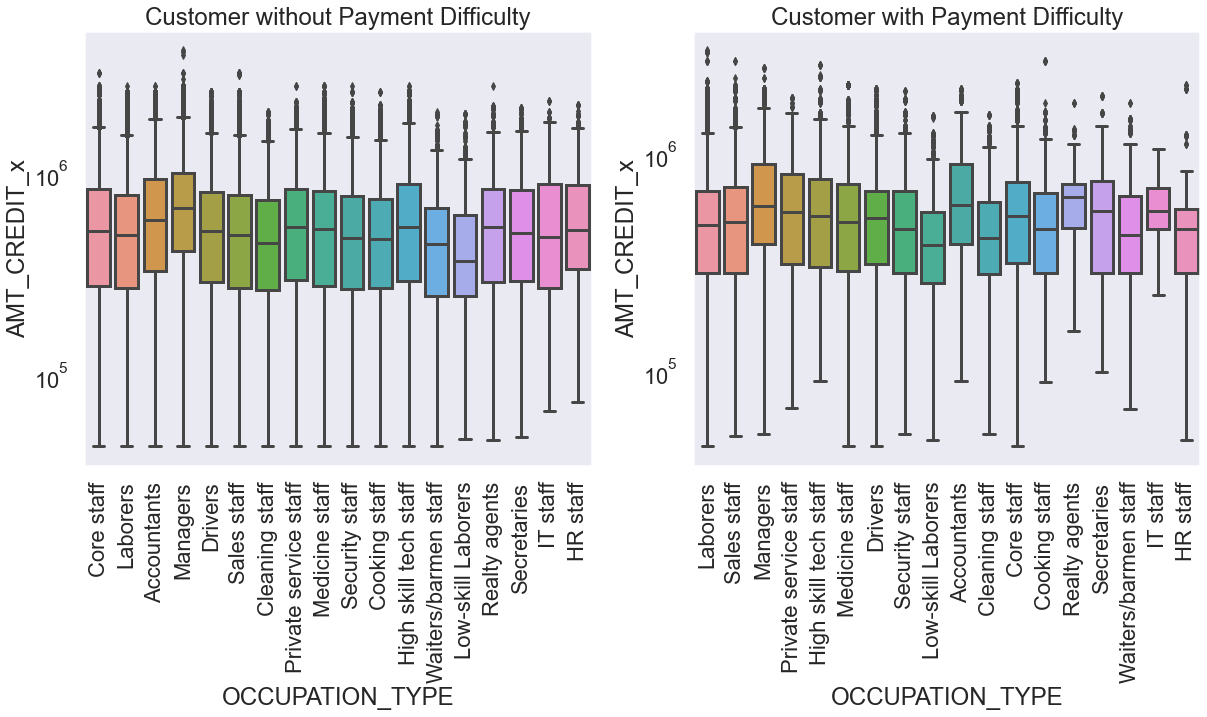

In [83]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.boxplot(data=merged0,y='AMT_CREDIT_x',x='OCCUPATION_TYPE')
plt.title('Customer without Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(data=merged1,y='AMT_CREDIT_x',x='OCCUPATION_TYPE')
plt.title('Customer with Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

* inference 1 = Security Staff and Cooking staff plots have similar median values.
* inference 2 = Managers, Accountants,IT staff,Reality agent are top client categories which took high credit amounts and facing difficulty repaying them back.

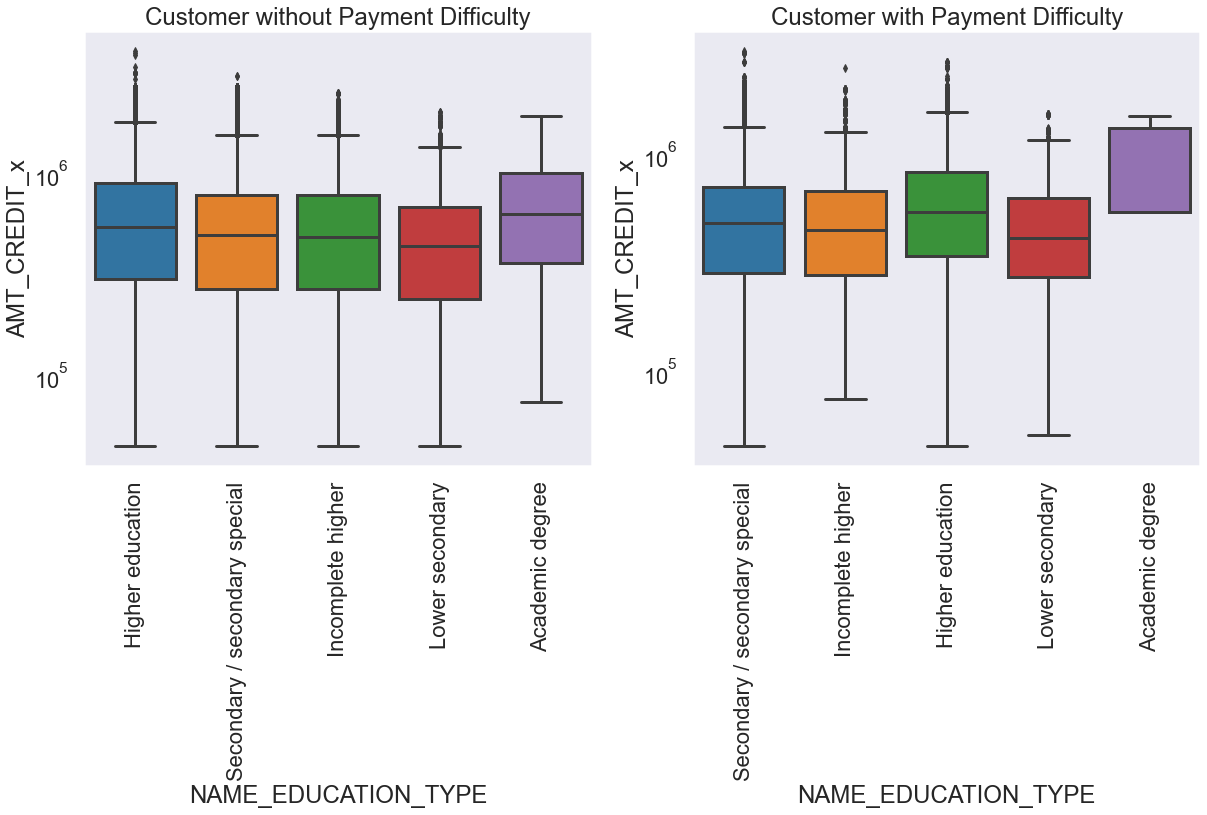

In [84]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=merged0,y='AMT_CREDIT_x',x='NAME_EDUCATION_TYPE')
plt.title('Customer without Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1,2,2)
ax = sns.boxplot(data=merged1,y='AMT_CREDIT_x',x='NAME_EDUCATION_TYPE')
plt.title('Customer with Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

* inference 1 = Client having academic degree takes more credit amount loans and then faces difficulty repaying them back.
* inference 2 = Client having lower secondary education takes less amount of loan and faces less difficulty in repaying them back.

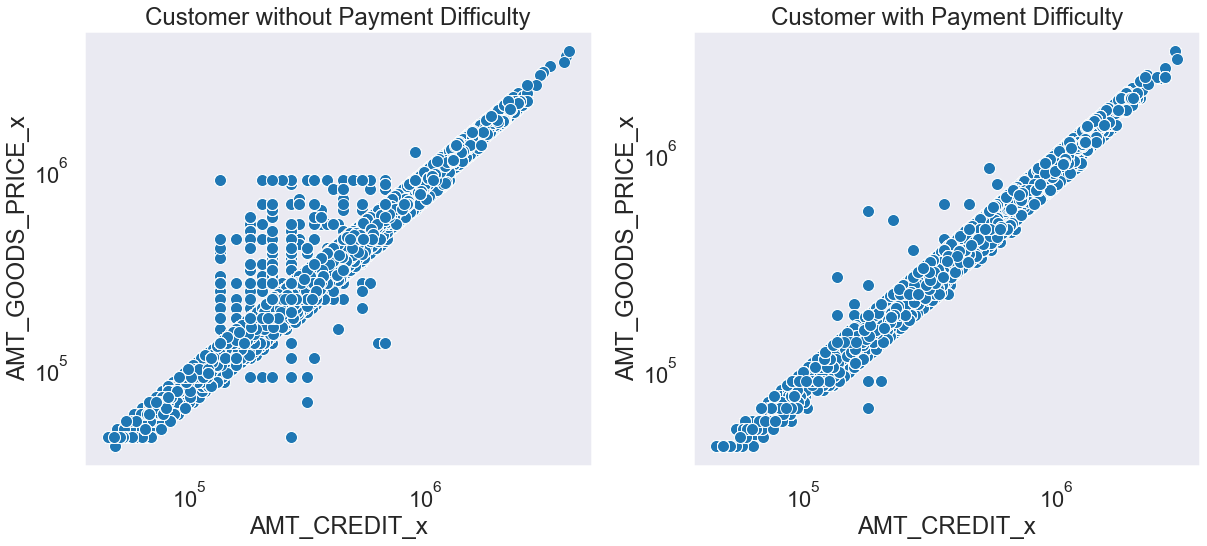

In [85]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=merged0,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer without Payment Difficulty')
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=merged1,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer with Payment Difficulty')
plt.yscale('log')
plt.xscale('log')
plt.show()

* inference 1 = The above data depicts that as the goods price increases, the credited amount also increases. The same data holds good for Customer without Payment Difficulty and Customers with payment difficulty

### Conclusion

1. For a successful revenue generation, Financing Company needs to concentrate on Businessmen, Pensioner and Students having ‘House/Apartment’  as compared to ‘Co-Op Apartment’.


2. They should provide less credit amount to clients having academic degrees as they are more likely to default the loan.


3. Avoid giving loans to clients who are on maternity leave as well as unemployed. 


4. Low skilled labourers are found to be the major credit defaulters. Less likely financing companies might face huge credit debts when they issue loan to these category. 


5. Clients prefer to have Loans issued via Cash than of any other means.
 
6. Married people are more likely to apply for loans and have a higher approval status. Companies should market more on NAME_FAMILY_STATUS = Married, to get higher and quick loan processed. 


7. Companies should provide loan to clients having age between 25-50 years.


8. Companies should provide loan to clients having work experience of more than 10 years to avoid facing defaulters.


9. Goods Category such as Furnitures, Mobile, Consumer Electronics, Computers  have highest refusal rate & defaulter rate. So these categories must be avoided


In [87]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
